<a href="https://colab.research.google.com/github/karandoshi1810/Machine-Learning/blob/main/Linear_Regression_Basic_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#To import datafiles from Google Drive
from google.colab import drive

In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression" 

In [ ]:
#To mount the drive data into colab cloud and enter the activation code
drive.mount('/content/drive')

NameError: ignored

In [ ]:
#columnname['x','y']
dataset=pd.read_csv("train.csv")
print(dataset)
dataset.shape


        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [ ]:
dataf = pd.DataFrame(dataset)#typecasting to dataframe
dataf.describe()#function to check the function of dataset


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
x_value=dataf.iloc[0:700,0:1]
y_value=dataf.iloc[0:700,1:2]
print(x_value)
print(y_value)

        x
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
..    ...
695  58.0
696  93.0
697  82.0
698  66.0
699  97.0

[700 rows x 1 columns]
             y
0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
..         ...
695  58.595006
696  94.625094
697  88.603770
698  63.648685
699  94.975266

[700 rows x 1 columns]


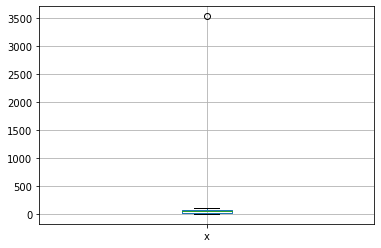

In [ ]:
x_box = x_value.boxplot(column=['x'])#to visualize outliers

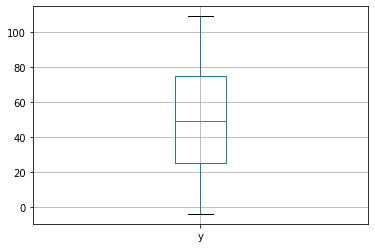

In [ ]:
y_box = y_value.boxplot(column=['y'])#to visualize outliers

Text(0.5, 1.0, 'First Linear Regression Scatter Plot')

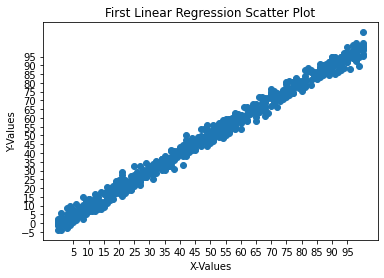

In [ ]:
#Visualization of data
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,100,step=5)) #units per cm or used for scaling
plt.yticks(np.arange(-5,100,step=5)) #units per cm or used for scaling
plt.xlabel("X-Values")
plt.ylabel("Y-Values")
plt.title("First Linear Regression Scatter Plot")

In [ ]:
#define hypothesis: theta_array[0]+theta_array[1]*x
def hypothesis(theta_array,x): #theta_array=[theta_array[0],theta_array[1]]
  return theta_array[0]+theta_array[1]*x

In [ ]:
#define cost function
def cost_function(theta_array,x,y,m):
  squared_error=0
  for value in range(m):
    squared_error+=(theta_array[0]+theta_array[1]*x[value]-y[value])**2 #compute error for every point
  return squared_error/(2*m) #return cost for this iteration

In [ ]:
#define gradient decent
def gradient_decent(theta_array,x,y,alpha,m):
  summation_0=0
  summation_1=0

  for i in range(m):
    summation_0+=theta_array[0]+theta_array[1]*x[i]-y[i] #calaulating theta0 for cost function
    summation_1+=(theta_array[0]+theta_array[1]*x[i]-y[i])*x[i] #calaulating theta1 for cost function

  new_theta_0=theta_array[0]-alpha*(summation_0)/m  
  new_theta_1=theta_array[1]-alpha*(summation_1)/m

  updated_theta_array=[new_theta_0,new_theta_1]
  #print(updated_theta_array)
  return updated_theta_array

In [ ]:
#training the model
def training(x,y,alpha,iters):
  theta_0=0
  theta_1=1
  theta_array = [theta_0,theta_1]
  cost_function_values=[]

  m=x.size    #size of dataset or total number of observations
  for i in range (iter):
    theta_array=gradient_decent(theta_array,x,y,alpha,m) #update thetas to get a new cost function
    cost_function_values.append(cost_function(theta_array,x,y,m))
    y_new=x*theta_array[1] + theta_array[0] #Linear Regression Line
    """plt.plot(x,y_new,'r')
    plt.scatter(x,y)
    plt.show()"""  
  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iterations")  
  plt.ylabel("Cost/Loss values")
  plt.show()
  return theta_array
  

In [ ]:
training_data=pd.read_csv("train.csv")
cleaning_dataset=training_data.dropna() #drops the observation for NaN
cleaning_dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
x_train=cleaning_dataset['x']

In [ ]:
y_train=cleaning_dataset['y']

In [ ]:
x_train.shape
x_value=x_train.values.reshape(x_train.size)
x_value.shape

(699,)

In [ ]:
y_train.shape
y_value=y_train.values.reshape(y_train.size)
y_value.shape

(699,)

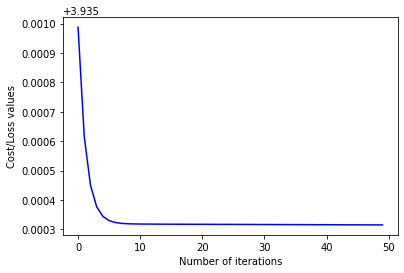

In [ ]:
alpha=0.0001
iter=100
theta_array = training(x_value,y_value,alpha,iter)